In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict
torch.cuda.is_available()

/home/psyrax/anaconda3/envs/hackathon2022/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
workDF = pd.read_csv('./workingDF.csv')
workDF.head()

,TIPO_TARJETA,IM_TRANSACCION,Giro,SubGiro,Edad,Sexo,IM_TX,giro_cat,subgiro_cat,edad_cat,sexo_cat,tipo_cat
0,CREDITO,495.00,REFACCIONES Y FERRETERIAS,"AUTOPARTES, ACCESORIOS AUTOMOTORES",56,M,0.002894,21,41,43,2,0
1,CREDITO,294.00,MISCELANEAS,"CARNICERIAS, PESCADERIAS, ABARROTES, MISCELANE...",45,F,0.001719,17,60,32,1,0
2,DEBITO,570.00,ENTRETENIMIENTO,PAGO DE SERVICIO POR TELEVISION CABLE/POR EVENTO,37,M,0.003332,7,182,24,2,1
3,DEBITO,301.00,VENTAS AL DETALLE (RETAIL),"TIENDAS DE CONVENIENCIA, MINISUPER",26,M,0.001760,31,258,13,2,1
4,DEBITO,393.65,OTROS,COMERCIOS ELECTRONICOS (VENTAS A TRAVES DE INT...,37,F,0.002301,19,70,24,1,1


In [3]:
workDFDummy = pd.get_dummies(workDF[['SubGiro']])
workDFDummy = workDFDummy.join(workDF[['IM_TX']])
workDFDummy.head()

,"SubGiro_(BOUTIQUE ROPA ESPECIAL), (BOUTIQUES LENCERIAS)","SubGiro_(ROPA CASUAL DAMAS), (BOUTIQUES ROPA CASUAL DAMAS)","SubGiro_(TIENDAS DE ARTICULOS USADOS), (TIENDAS DE ARTICULOS DE SEGUNDA",SubGiro_?,SubGiro_A1 RENT A CAR,"SubGiro_ACCESORIOS ELECTRODOMESTICOS, (ELECTRODOMESTICOS NO","SubGiro_ACCESORIOS JARDIN, (ACCESORIOS JARDININERIA),",SubGiro_ACCESORIOS INDUSTRIALES NO CLASIFICADOS,"SubGiro_ACCESORIOS PARA FLORERIAS, FLORES E INVERNADEROS","SubGiro_ACUARIOS, ESPECTACULOS MARINOS",...,"SubGiro_UNIVERSIDADES, (COLEGIOS Y PREPARATORIAS), (ESCUELAS PROFESIONALES),","SubGiro_VEHICULOS DE MOTOR, ACCESORIOS Y AUTO PARTES","SubGiro_VENTA DE TOLDOS, (VENTA DE TIENDAS DE CAMPANA),","SubGiro_VENTA DE VIDEO JUEGOS, ACCESORIOS","SubGiro_VENTA, SERVICIO, ACCESORIOS ALBERCAS",SubGiro_VENTAS DE SALDOS,SubGiro_VIDEO JUEGOS ESTABLECIMIENTOS,SubGiro_WESTIN HOTELS,SubGiro_ZAPATERIAS,IM_TX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002894
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001719
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003332
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001760
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002301


In [4]:
x = torch.from_numpy(workDFDummy.to_numpy())

In [5]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=7, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 5it [00:06,  1.29s/it, center_shift=0.000000, iteration=5, tol=0.000100] 


In [6]:
print(cluster_ids_x)
print(cluster_centers)

tensor([3, 2, 3,  ..., 0, 0, 3])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0035],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0006],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0020],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0117],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0035],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0006]])


In [7]:
workDF['Cluster'] = cluster_ids_x

In [8]:
workDF[workDF['Giro']== 'FARMACIAS']

,TIPO_TARJETA,IM_TRANSACCION,Giro,SubGiro,Edad,Sexo,IM_TX,giro_cat,subgiro_cat,edad_cat,sexo_cat,tipo_cat,Cluster
11,DEBITO,410.00,FARMACIAS,"DROGUERIAS,",29,F,0.002397,9,105,16,1,1,2
48,DEBITO,475.00,FARMACIAS,"DROGUERIAS,",27,F,0.002777,9,105,14,1,1,2
72,CREDITO,1313.50,FARMACIAS,"DROGUERIAS,",76,F,0.007679,9,105,63,1,0,2
73,DEBITO,490.77,FARMACIAS,"DROGUERIAS,",48,F,0.002869,9,105,35,1,1,2
111,CREDITO,147.50,FARMACIAS,"DROGUERIAS,",44,F,0.000862,9,105,31,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434807,DEBITO,240.50,FARMACIAS,"DROGUERIAS,",42,F,0.001406,9,105,29,1,1,2
434813,DEBITO,358.50,FARMACIAS,"DROGUERIAS,",34,F,0.002096,9,105,21,1,1,2
434816,CREDITO,474.00,FARMACIAS,"DROGUERIAS,",34,F,0.002771,9,105,21,1,0,2
434819,DEBITO,210.50,FARMACIAS,"DROGUERIAS,",34,F,0.001231,9,105,21,1,1,2


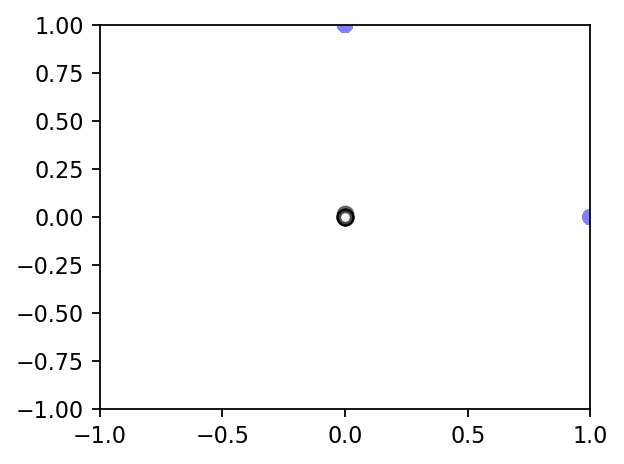

In [9]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()